In [ ]:
# Persiapan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-04 08:48:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.71MB/s    in 53s     

2021-05-04 08:49:33 (5.79 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
!pip install split-folders
import splitfolders

# split data dalam folder /tmp/rockpaperscissors/rps-cv-images menjadi folder train dan val
splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors/output", seed=1337, ratio=(.6,.4))

Copying files: 2188 files [00:00, 3354.05 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# membuat object image data generator (augmentasi gambar)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,  # 20
                    horizontal_flip=True,
                    shear_range = 0.45,  # 0.2
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    horizontal_flip=True,
                    shear_range = 0.45,
                    fill_mode = 'nearest')

In [ ]:
# mempersiapkan data dengan object image data generator sebelumnya
train_generator = train_datagen.flow_from_directory(
        "/tmp/rockpaperscissors/output/train",
        target_size=(150, 150),
        batch_size=20,  # 32
        class_mode='categorical',
        shuffle=True)
 
validation_generator = test_datagen.flow_from_directory(
        "/tmp/rockpaperscissors/output/val",
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=True)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat class callback dan objectnya

class callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
            print("\nakurasi cukup, berhenti disini!") 
            self.model.stop_training = True 
 
callbacks = callback()

In [ ]:
# membuat model cnn
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu', name='layer1'),  # 512
    tf.keras.layers.Dense(300, activation='relu', name='layer2'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model sebelumnya
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/20
25/25 - 29s - loss: 1.1066 - accuracy: 0.3400 - val_loss: 1.0804 - val_accuracy: 0.4500
Epoch 2/20
25/25 - 28s - loss: 0.9954 - accuracy: 0.5183 - val_loss: 0.9040 - val_accuracy: 0.5700
Epoch 3/20
25/25 - 28s - loss: 0.8668 - accuracy: 0.5880 - val_loss: 0.7391 - val_accuracy: 0.7200
Epoch 4/20
25/25 - 28s - loss: 0.6120 - accuracy: 0.7680 - val_loss: 0.6224 - val_accuracy: 0.7300
Epoch 5/20
25/25 - 28s - loss: 0.5135 - accuracy: 0.8049 - val_loss: 0.4624 - val_accuracy: 0.8200
Epoch 6/20
25/25 - 28s - loss: 0.3989 - accuracy: 0.8500 - val_loss: 0.4223 - val_accuracy: 0.8100
Epoch 7/20
25/25 - 28s - loss: 0.3472 - accuracy: 0.8680 - val_loss: 0.5328 - val_accuracy: 0.7800
Epoch 8/20
25/25 - 28s - loss: 0.3232 - accuracy: 0.8640 - val_loss: 0.1943 - val_accuracy: 0.9300
Epoch 9/20
25/25 - 28s - loss: 0.2448 - accuracy: 0.9080 - val_loss: 0.2620 - val_accuracy: 0.8900
Epoch 10/20
25/25 - 28s - loss: 0.2880 - accuracy: 0.9065 - val_loss: 0.2444 - val_accuracy: 0.9200
Epoch 11/

Saving batu2.jpg to batu2 (1).jpg
batu2.jpg
batu


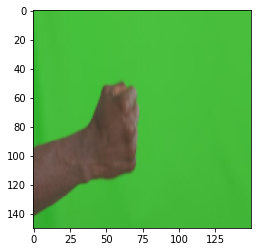

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')

Saving gunting2.webp to gunting2 (1).webp
gunting2.webp
gunting


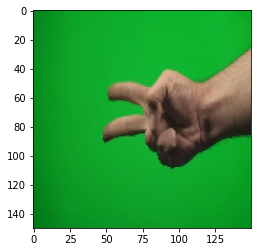

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')

Saving kertas2.jpg to kertas2 (1).jpg
kertas2.jpg
kertas


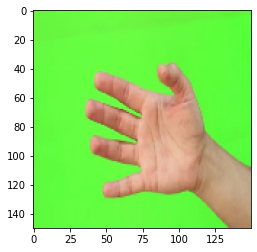

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('kertas')
  elif classes[0,1]!=0:
    print('batu')
  else:
    print('gunting')

Nama  : Fatah Abdi Prakoso

Alamat: Kabupaten Malang, Jawa Timur